In [ ]:
!pip install flash_attn -q timm -q
!pip install accelerate -q
!pip install einops -q

In [2]:
!mkdir my_models
!mkdir my_models/Florence_2

# Moedel

Florence-2-large-ft is a fine-tuned model.

In [ ]:
from transformers import AutoModelForCausalLM, AutoProcessor


model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large-ft",
                                             cache_dir="/content/my_models/Florence_2",
                                             device_map="cuda",
                                             trust_remote_code=True)



In [16]:
processor = AutoProcessor.from_pretrained("/content/my_models/Florence_2/models--microsoft--Florence-2-large-ft/snapshots/3112cd2e25c969cfdcb600a01489c56737d943d3",
                                             trust_remote_code=True)

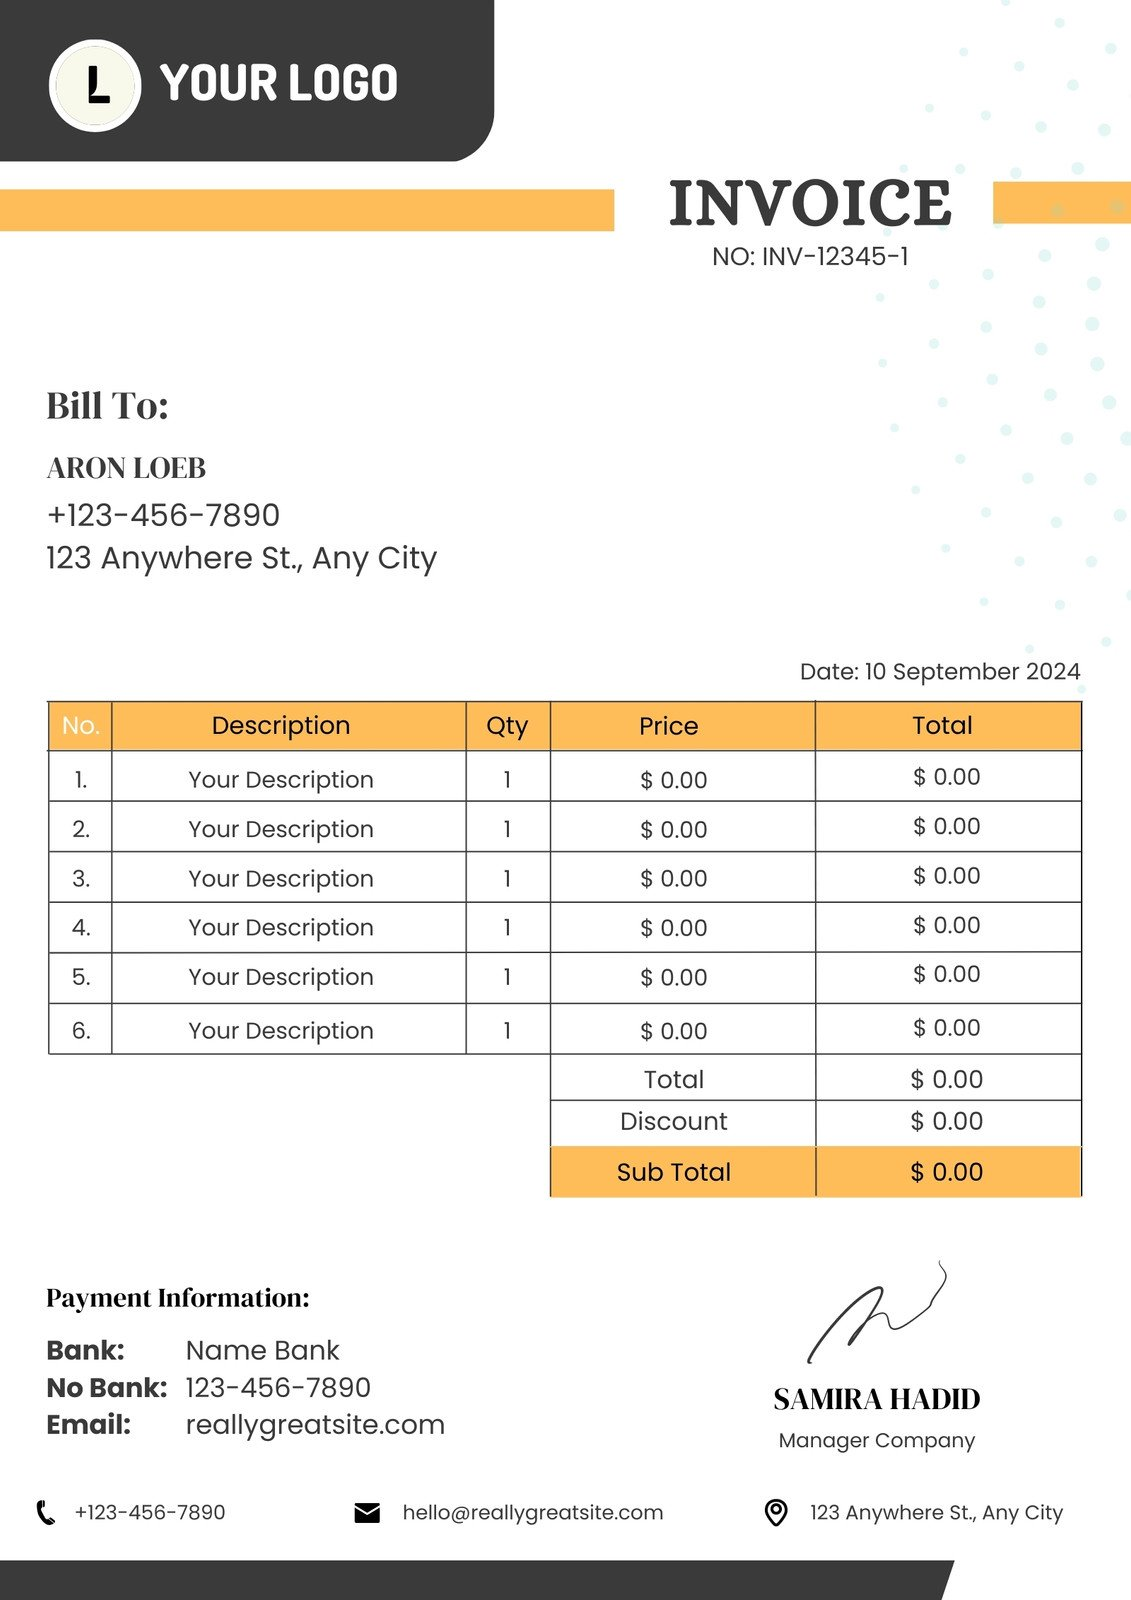

In [21]:
import requests
from PIL import Image

url = "https://marketplace.canva.com/EAFXqL8NfTQ/1/0/1131w/canva-black-%26-orange-a4-professional-invoice-ZAbveYe41E8.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

# Preprocess the Input

OCR_WITH_REGION --> text with its coordinates. If you like, you will use OCR.

In [22]:
prompt = '<OCR_WITH_REGION>'

inputs = processor(text=prompt, images=image, return_tensors="pt").to("cuda:0")

In [23]:
inputs

{'input_ids': tensor([[   0, 2264,   16,    5, 2788,   11,    5, 2274,    6,   19, 3806,  116,
            2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[-1.1247, -1.1247, -1.1247,  ...,  2.2489,  2.2489,  2.2489],
          [-1.1247, -1.1247, -1.1247,  ...,  2.2489,  2.2489,  2.2489],
          [-1.1247, -1.1247, -1.1247,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [-1.1247, -1.1247, -1.1247,  ...,  2.2489,  2.2489,  2.2489],
          [-1.1247, -1.1247, -1.1247,  ...,  2.2489,  2.2489,  2.2489],
          [-1.1247, -1.1247, -1.1247,  ...,  2.2489,  2.2489,  2.2489]],

         [[-1.0203, -1.0203, -1.0203,  ...,  2.4286,  2.4286,  2.4286],
          [-1.0203, -1.0203, -1.0203,  ...,  2.4286,  2.4286,  2.4286],
          [-1.0203, -1.0203, -1.0203,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [-1.0203, -1.0203, -1.0203,  ...,  2.4286,  2.4286,  2.4286],
          [-1.02

# Generate Response

In [24]:
%%time
generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=4096,
      num_beams=3
    )

CPU times: user 12.1 s, sys: 3.44 ms, total: 12.1 s
Wall time: 12.2 s


In [25]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
generated_text

'</s><s><s><s>L<loc_72><loc_39><loc_99><loc_39><loc_100><loc_67><loc_73><loc_67>YOUR LOGO<loc_139><loc_37><loc_353><loc_37><loc_353><loc_65><loc_139><loc_65>INVOICE<loc_588><loc_109><loc_843><loc_109><loc_843><loc_143><loc_588><loc_143>NO: INV-12345-1<loc_628><loc_152><loc_805><loc_152><loc_805><loc_168><loc_628><loc_168>Bill To:<loc_39><loc_243><loc_151><loc_243><loc_151><loc_264><loc_39><loc_264>ARON LOEB<loc_39><loc_283><loc_185><loc_283><loc_185><loc_302><loc_39><loc_302>+123-456-7890<loc_41><loc_312><loc_249><loc_312><loc_249><loc_331><loc_41><loc_331>123 anywhere St., Any City<loc_39><loc_338><loc_388><loc_339><loc_388><loc_362><loc_39><loc_360>Date: 10 September 2024<loc_706><loc_412><loc_958><loc_412><loc_958><loc_427><loc_706><loc_427>No.<loc_54><loc_447><loc_89><loc_447><loc_89><loc_461><loc_54><loc_461>Description<loc_187><loc_446><loc_311><loc_446><loc_311><loc_462><loc_187><loc_462>Qty<loc_429><loc_446><loc_468><loc_447><loc_468><loc_463><loc_429><loc_462>Price<loc_564><lo

In [26]:
parsed_answer = processor.post_process_generation(generated_text, task=prompt, image_size=(image.width, image.height))
parsed_answer['<OCR_WITH_REGION>']

{'quad_boxes': [[81.99750518798828,
   63.20000076293945,
   112.53450775146484,
   63.20000076293945,
   113.6655044555664,
   108.0,
   83.12850189208984,
   108.0],
  [157.77450561523438,
   60.0,
   399.8085021972656,
   60.0,
   399.8085021972656,
   104.80000305175781,
   157.77450561523438,
   104.80000305175781],
  [665.593505859375,
   175.1999969482422,
   953.99853515625,
   175.1999969482422,
   953.99853515625,
   229.60000610351562,
   665.593505859375,
   229.60000610351562],
  [710.83349609375,
   244.0,
   911.0205078125,
   244.0,
   911.0205078125,
   269.6000061035156,
   710.83349609375,
   269.6000061035156],
  [44.674503326416016,
   389.6000061035156,
   171.3465118408203,
   389.6000061035156,
   171.3465118408203,
   423.20001220703125,
   44.674503326416016,
   423.20001220703125],
  [44.674503326416016,
   453.6000061035156,
   209.80050659179688,
   453.6000061035156,
   209.80050659179688,
   484.0,
   44.674503326416016,
   484.0],
  [46.936500549316406,


# Draw on Image

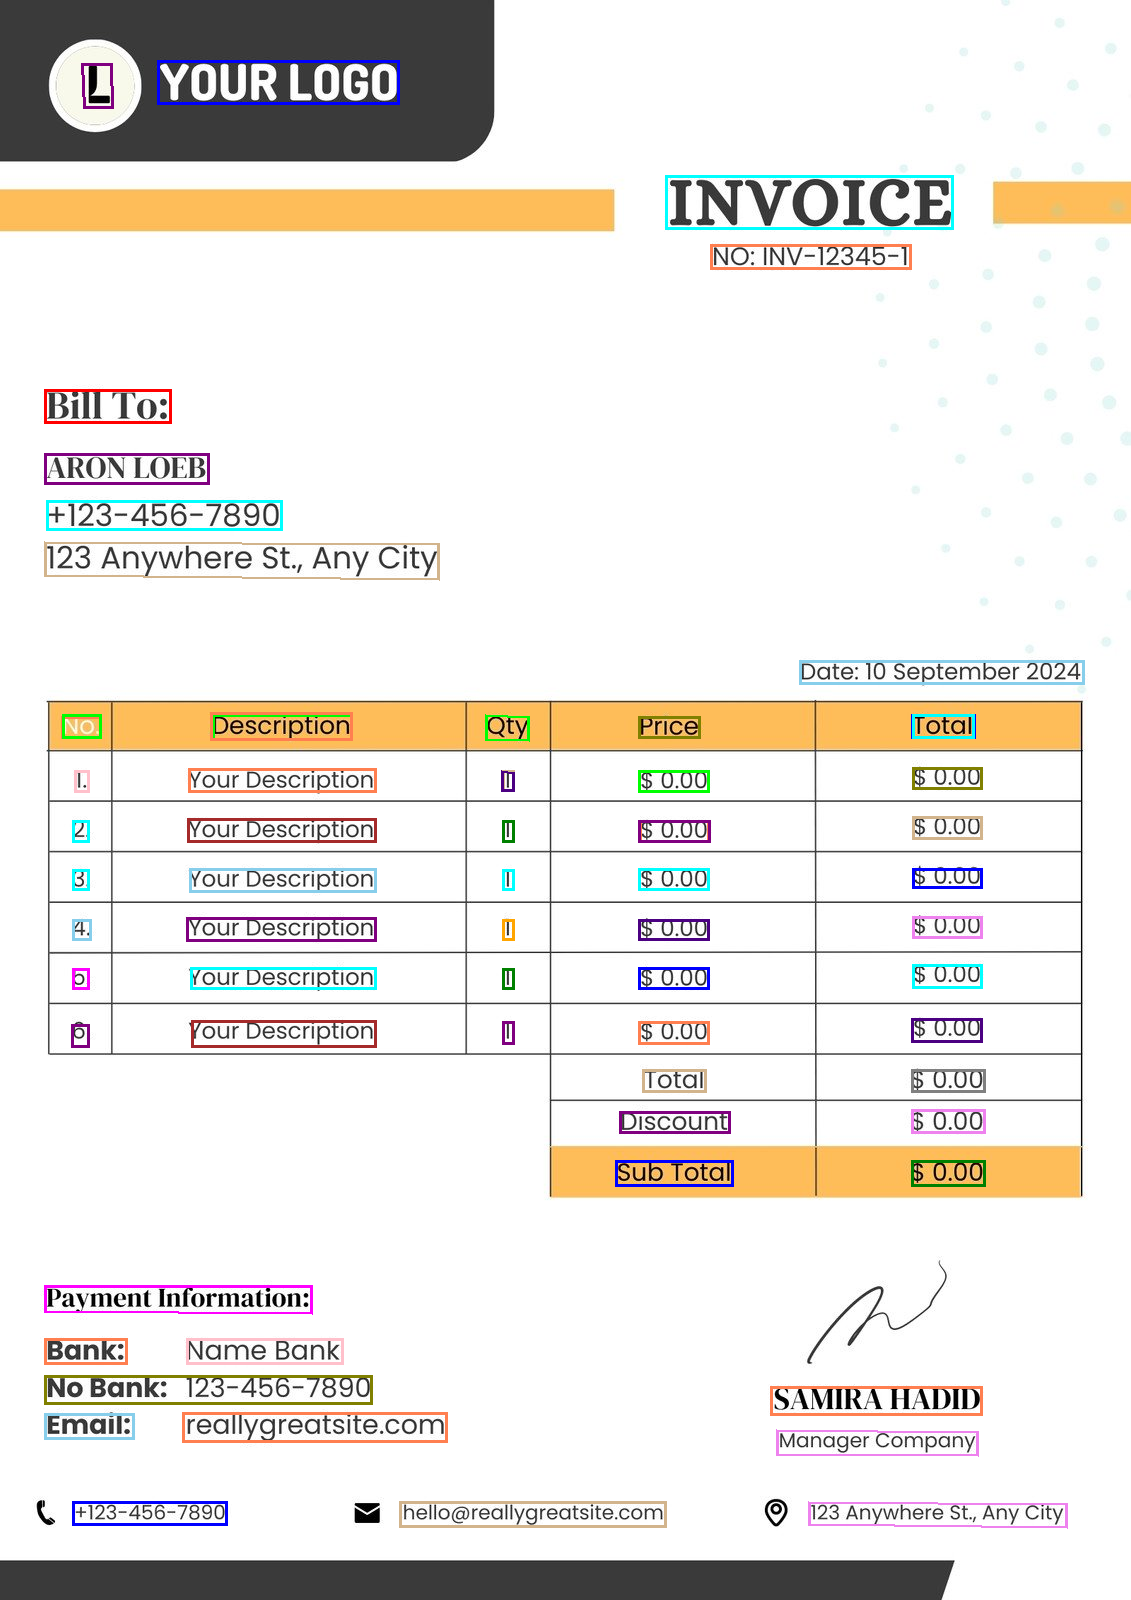

In [27]:
import copy
from PIL import Image, ImageDraw, ImageFont
import random

import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']


def draw_ocr_bboxes(image, prediction):
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)

    display(image)

output_image = copy.deepcopy(image)
draw_ocr_bboxes(output_image, parsed_answer['<OCR_WITH_REGION>'])